<a href="https://colab.research.google.com/github/Manish-k723/100-days-of-ML/blob/main/Day_35_Handling_Missing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day35-complete-case-analysis/data_science_job.csv')

In [6]:
df.shape

(19158, 13)

In [13]:
df[df['city_development_index']==max(df.city_development_index)].shape,df[df['city_development_index']==min(df.city_development_index)].shape

((76, 13), (17, 13))

In [5]:
df.sample(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
12742,5273,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,1.0,NaN,NaN,76.0,0.0
6588,23916,city_98,0.949,NaN,No relevent experience,no_enrollment,Graduate,STEM,10.0,NaN,NaN,268.0,1.0
13791,21507,city_114,0.926,NaN,No relevent experience,Full time course,High School,NaN,1.0,50-99,Public Sector,74.0,0.0
9859,27128,city_103,0.920,Male,No relevent experience,Full time course,Masters,STEM,9.0,NaN,Public Sector,166.0,0.0
6521,20015,city_138,0.836,Male,Has relevent experience,Part time course,Graduate,STEM,13.0,50-99,Public Sector,21.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB


In [4]:
df.isna().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [19]:
df.corr()['target']

enrollee_id               0.049475
city_development_index   -0.340239
experience               -0.178238
training_hours           -0.021706
target                    1.000000
Name: target, dtype: float64

In [20]:
cols = [var for var in df.columns if df[var].isnull().mean()<=0.05 and df[var].isnull().mean()>0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [21]:
df[cols]

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
3,0.789,NaN,Graduate,0.0,52.0
4,0.767,no_enrollment,Masters,20.0,8.0
...,...,...,...,...,...
19153,0.878,no_enrollment,Graduate,14.0,42.0
19154,0.920,no_enrollment,Graduate,14.0,52.0
19155,0.920,no_enrollment,Graduate,20.0,44.0
19156,0.802,no_enrollment,High School,0.0,97.0


In [22]:
len(df[cols].dropna())/len(df)

0.8968577095730244

In [23]:
new_df = df[cols].dropna()
new_df.shape, df.shape

((17182, 5), (19158, 13))

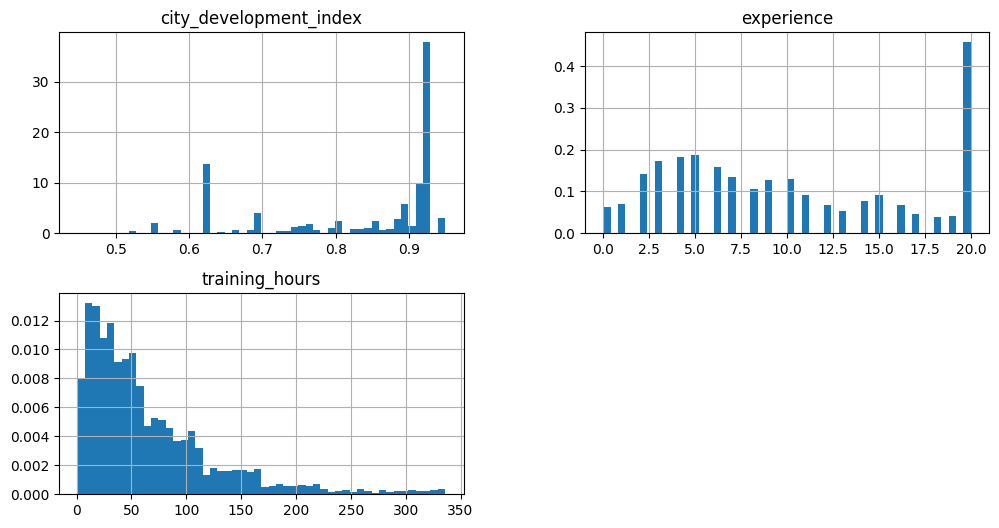

In [51]:
new_df.hist(bins = 50, density = True, figsize = (12,6))
plt.show()

So, we have applied CCA succesfully. Now we need to check that the distribution of data before and after CCA should be almost equal. We will do it using graphs.

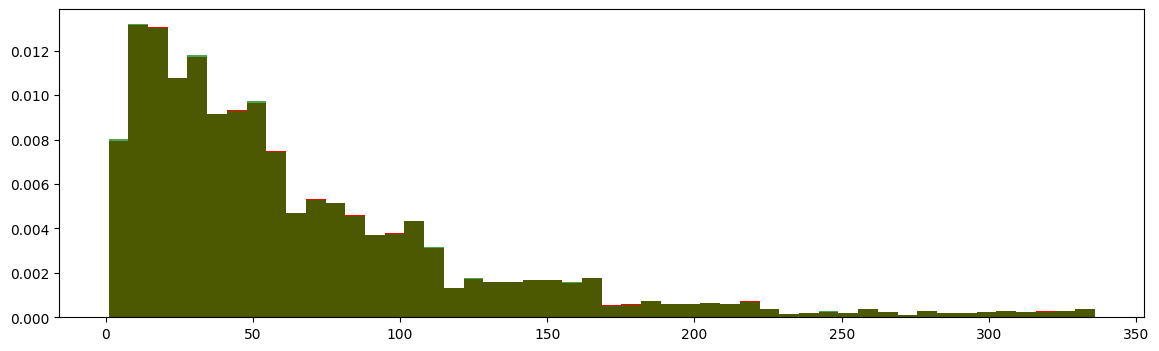

In [67]:
plt.figure(figsize = (14,4))
plt.subplot(111)
plt.hist(df['training_hours'],bins = 50, color = 'r', density = True)
# plt.show()
plt.subplot(111)
plt.hist(new_df['training_hours'],bins = 50, color = 'g', density = True, alpha = 0.7)
plt.show()

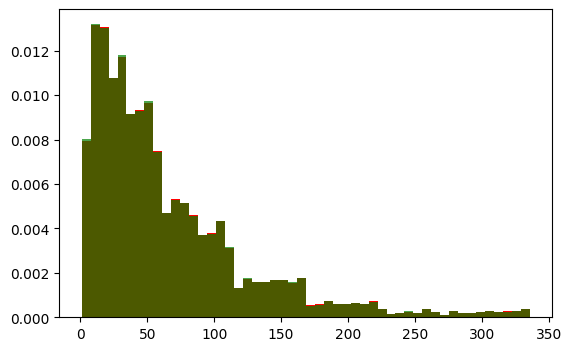

In [38]:
plt.figure(figsize = (14,4))
plt.subplot(121)
plt.hist(df['training_hours'],bins = 50, color = 'r', density = True)
# plt.show()
plt.subplot(121)
plt.hist(new_df['training_hours'],bins = 50, color = 'g', density = True, alpha = 0.7)
plt.show()

<Axes: >

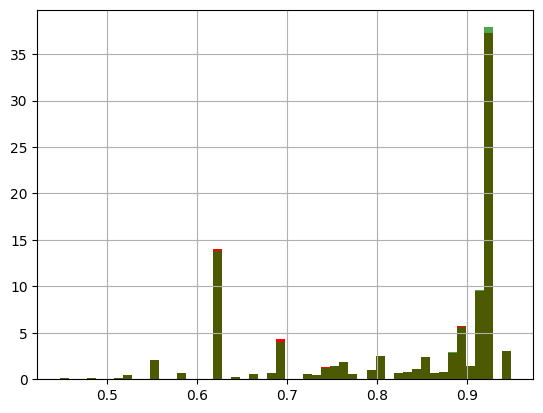

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['city_development_index'].hist(bins = 50,ax = ax, density = True, color = 'r')

new_df['city_development_index'].hist(bins = 50,ax = ax, density = True, color = 'g',alpha = 0.7)


<Axes: >

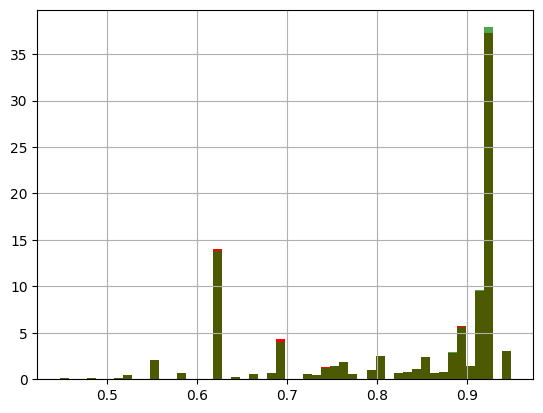

In [44]:
# fig = plt.figure()
# ax = fig.add_subplot(111)

df['city_development_index'].hist(bins = 50, density = True, color = 'r')

new_df['city_development_index'].hist(bins = 50, density = True, color = 'g',alpha = 0.7)


<Axes: ylabel='Density'>

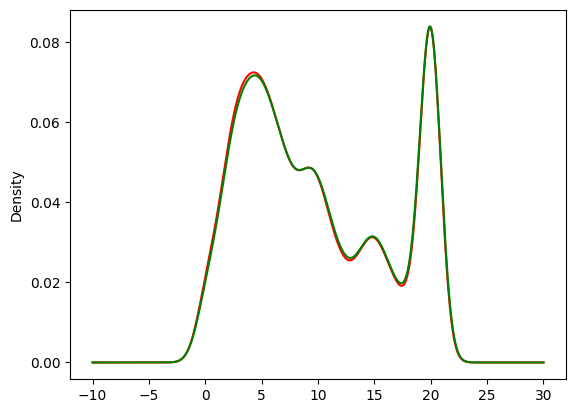

In [70]:
df['experience'].plot.density(color = 'red')
new_df['experience'].plot.density(color = 'green')

All the graphs shows that the distribution of data after transformation is overlapping with the data before transformation

Now, Let's verify the constraint with categorical data also.

In [71]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['enrolled_university'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['enrolled_university'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [72]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['education_level'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['education_level'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


In [40]:
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']